In [1]:
using Plots;
using LaTeXStrings;
using DelimitedFiles;

## Aumento de Performance con tratamiento de partículas idénticas

In [2]:
timming_file = raw"../../study_of_performance_01/result_collection_total_timing_data_v2.dat";
timming_matrix = readdlm(timming_file);

In [3]:
timming_matrix2 = Matrix{Any}(undef, 4, 2)

timming_matrix2[1:4,1]=[    "NO-identical\nNO-parallel",
                            "YES-identical\nNO-parallel",
                            "NO-identical\nYES-parallel",
                            "YES-identical\nYES-parallel"]

for i in 1:4
    timming_matrix2[i,2]=sum(timming_matrix[(20*i-19):(20*i),3])/20.0;
end

println("max_value = ", maximum(timming_matrix2[1:end,2]));

max_value = 804.35


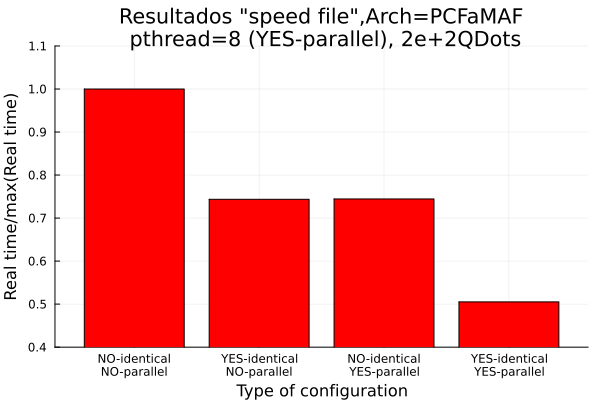

In [4]:
plot1=plot(timming_matrix2[1:end,1],timming_matrix2[1:end,2]/maximum(timming_matrix2[1:end,2]),seriestype =:bar,color="red",label="",ylims=(0.4,1.1))
plot1=plot!(title="Resultados \"speed file\",Arch=PCFaMAF\n pthread=8 (YES-parallel), 2e+2QDots",xlabel="Type of configuration",ylabel="Real time/max(Real time)")

savefig(plot1,"./plots/RealTimevsIdentPartandParallel.pdf");
display(plot1);

In [6]:
timming_file = raw"../running_whit_openblas/result_collection_total_timing_data.dat";
timming_matrix = readdlm(timming_file);

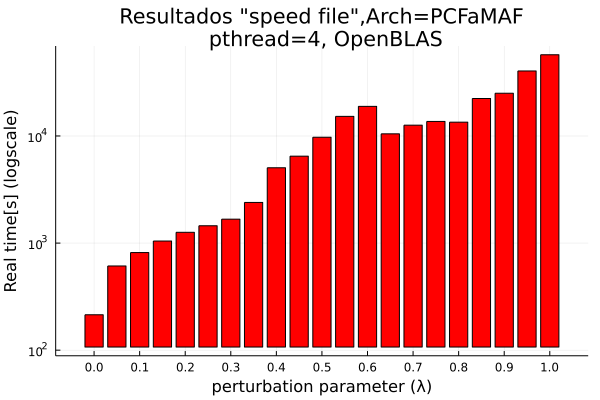

In [7]:
plot1=plot(timming_matrix[2:end,1],timming_matrix[2:end,2],seriestype =:bar,color="red",label="",yaxis=:log,xticks=(0.0:0.1:1.0))
plot1=plot!(title="Resultados \"speed file\",Arch=PCFaMAF\n pthread=4, OpenBLAS",xlabel="perturbation parameter (λ)",ylabel="Real time[s] (logscale)")
savefig(plot1,"./plots/RealTimevsPerturbationParameter.pdf");
display(plot1);

### Característica de configuraciones simuladas para análisis de performance

Para todos los casos se utilizaron parámetros $\lambda=0.5$ y $V_L=0.9[au]$.

### Tipos de configuraciones con y sin paquete OpenBLAS

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS (según corresponda)
```bash
    # OpenMP
    export OMP_SCHEDULE="auto"
    export OMP_STACKSIZE="512M"
    # OpenBLAS
    export USE_THREAD=0
    export USE_LOCKING=1
```

Dentro de `input_file.inp` se utilizó la siguiente configuración para paralelismo con POSIX threads
```bash
    usepthreads=4
```

+ 01_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración I de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=1
        export OPENBLAS_NUM_THREADS=4
    ```
+ 02_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración II de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=1
    ```
+ 03_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración II de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=4
    ```
+ 04_whitout_openblas folder
  + Configuración sin utilizar OpenBLAS (se tuvo que recompilar mctdh sin linkeo a librería OpenBLAS)
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=4
    ```

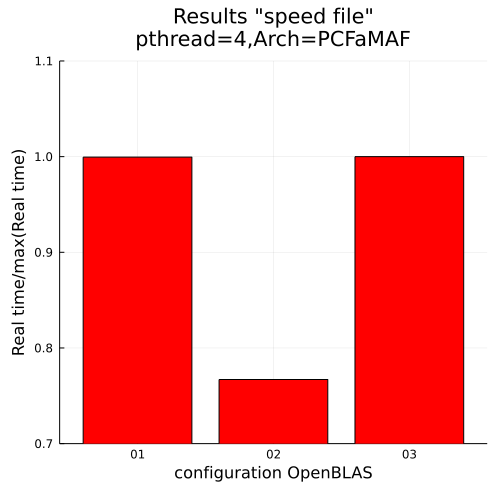

In [12]:
conf = ["01","02","03"]
time = [10211,7836,10216]
plot1 = plot(conf,time/maximum(time),seriestype =:bar,color="red",label="",ylims=(0.7,1.1))
plot1 = plot!(title="Results \"speed file\"\npthread=4,Arch=PCFaMAF",xlabel="configuration OpenBLAS",ylabel="Real time/max(Real time)",size=(500,500))

savefig(plot1,"./plots/RealTimevsBLASvsOpenBLAS_01.pdf");
display(plot1);

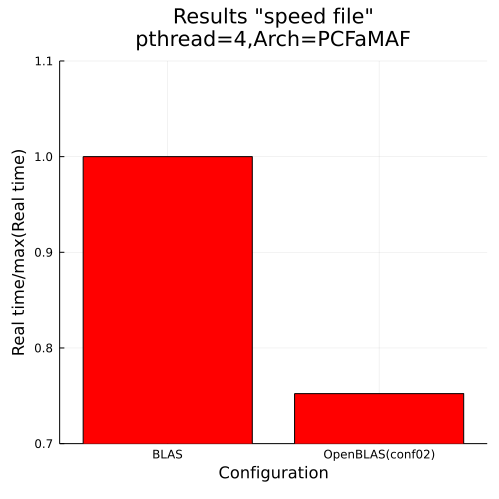

In [11]:
conf = ["BLAS","OpenBLAS(conf02)"]
time = [10416,7836]
plot2 = plot(conf,time/maximum(time),seriestype =:bar,color="red",label="",ylims=(0.7,1.1))
plot2 = plot!(title="Results \"speed file\"\npthread=4,Arch=PCFaMAF",xlabel="Configuration",ylabel="Real time/max(Real time)",size=(500,500))

savefig(plot2,"./plots/RealTimevsBLASvsOpenBLAS_02.pdf");
display(plot2);

### Tipos de configuraciones con OpenBLAS aumentando el número de threads

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS
```bash
    # OpenMP
    export OMP_SCHEDULE="auto"
    export OMP_STACKSIZE="512M"
    # OpenBLAS
    export USE_THREAD=0
    export USE_LOCKING=1
```

+ 05_whit_openblas_01pthreads folder
  + Configuración utilizando 1 pthread para paralelismo con POSIX threads
    ```bash
        # dentro de input_file.inp
        usepthreads=4
        # dentro de script_run.sh
        export OMP_NUM_THREADS=1
        export OPENBLAS_NUM_THREADS=1
    ```
+ 06_whit_openblas_02pthreads folder
  + Configuración utilizando 2 pthreads para paralelismo con POSIX threads
    ```bash
        # dentro de input_file.inp
        usepthreads=2
        # dentro de script_run.sh
        export OMP_NUM_THREADS=2
        export OPENBLAS_NUM_THREADS=1
    ```
+ 07_whit_openblas_03pthreads folder
  + Configuración utilizando 3 pthreads para paralelismo con POSIX threads
    ```bash
        # dentro de input_file.inp
        usepthreads=3
        # dentro de script_run.sh
        export OMP_NUM_THREADS=3
        export OPENBLAS_NUM_THREADS=1
    ```
+ 02_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración II de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=1
    ```

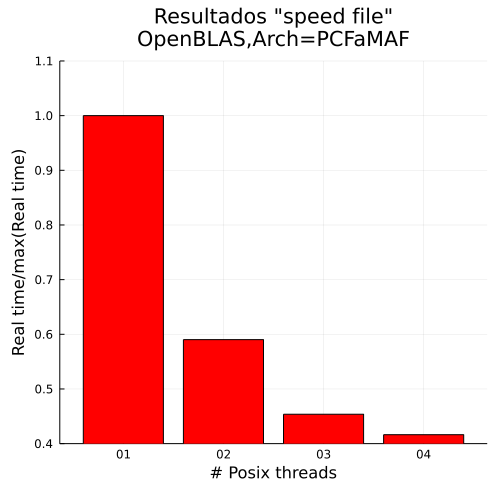

In [44]:
conf = ["01","02","03","04"]
time = [18821,11109,8540,7836]
plot1=plot(conf,time/maximum(time),seriestype =:bar,size=(500,500),color="red",label="",ylims=(0.4,1.1))
plot1=plot!(title="Resultados \"speed file\"\nOpenBLAS,Arch=PCFaMAF",xlabel="# Posix threads",ylabel="Real time/max(Real time)")
savefig(plot1,"./plots/RealTimevsPosixThreads.pdf");
display(plot1);

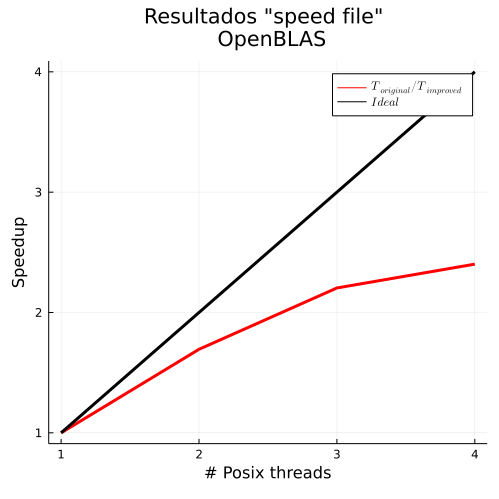

In [14]:
processors = [1,2,3,4]
time = [18821.0,11109.0,8540.0,7836.0]
speedup=copy(time)
@. speedup=time[1]/time

plot(processors,speedup,size=(500,500),color="red",label="\$T_{original}/T_{improved}\$",lw=3)
plot!(title="Resultados \"speed file\" \n OpenBLAS",xlabel="# Posix threads",ylabel="Speedup")
plot!(processors,processors,size=(500,500),color="black",label="\$Ideal\$",lw=3)

### Tipos de configuraciones con OpenBLAS cambiando el schedule en la paralelización con OpenMP

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS (según corresponda)
```bash
    # OpenMP
    export OMP_NUM_THREADS=2
    export OMP_STACKSIZE="512M"
    # OpenBLAS
    export OPENBLAS_NUM_THREADS=1
    export USE_THREAD=0
    export USE_LOCKING=1
```

Dentro de `input_file.inp` se utilizó la siguiente configuración para paralelismo con POSIX threads
```bash
    usepthreads=2
```

+ 06_whit_openblas_02pthreads folder
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="auto"
    ```
+ 08_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="static,default"
    ```
+ 09_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="guided"
    ```
+ 10_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      chunksize=128
      export OMP_SCHEDULE="dynamic,${chunksize}"
    ```
+ 11_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      chunksize=128
      export OMP_SCHEDULE="static,${chunksize}"
    ```

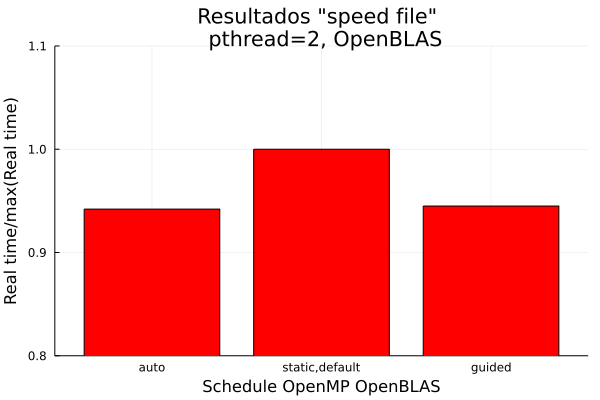

In [62]:
conf = ["auto","static,default","guided"] # [06folder,08folder,09folder]
time = [11109,11792,11144]
plt1 = plot(conf,time/maximum(time),seriestype =:bar,color="red",label="",ylims=(0.8,1.1))
plot1 = plot!(plt1,title="Resultados \"speed file\" \n pthread=2, OpenBLAS",xlabel="Schedule OpenMP OpenBLAS",ylabel="Real time/max(Real time)")

# conf = ["dynamic,128","static,128"] # [10folder,11folder]
# time = [11279,10888]
# plt2 = plot(conf,time/maximum(time),seriestype =:bar,color="red",label="",ylims=(0.8,1.1))
# plot2 = plot!(plt2,title="Resultados \"speed file\" \n pthread=2, OpenBLAS",xlabel="Schedule OpenMP OpenBLAS",ylabel="Real time/max(Real time)")

savefig(plot1,"./plots/RealTimevsScheduleOpenMPOpenBLAS.pdf");
display(plot1);

### Tipos de configuraciones con OpenBLAS cambiando el schedule en la paralelización con OpenMP

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS (según corresponda)
```bash
    # OpenMP
    export OMP_NUM_THREADS=2
    # OpenBLAS
    export OPENBLAS_NUM_THREADS=1
    export USE_THREAD=0
    export USE_LOCKING=1
```

Dentro de `input_file.inp` se utilizó la siguiente configuración para paralelismo con POSIX threads
```bash
    usepthreads=2
```

El objetivo fue cambiar el parámetro ```chunksize``` dentro de la variable de entorno ```OMP_SCHEDULE``` y medir los tiempos de CPU. Los tamaños analizados para la variable ```chunksize``` fueron de $$ chunksize={16,32,64,128,256,512,1024} $$

+ 12_whit_openblas_04schedule_chunksize
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="dynamic,${chunksize}"
    ```

In [5]:
timming_file1 = raw"./12_whit_openblas_04schedule_chunksize/result_collection_total_timing_data.dat";
timming_matrix1 = readdlm(timming_file1);

timming_file2 = raw"./13_whit_openblas_03schedule_chunksize/result_collection_total_timing_data.dat";
timming_matrix2 = readdlm(timming_file2);

maxvalue1=maximum(timming_matrix1[2:end,2]);
maxvalue2=maximum(timming_matrix2[2:end,2]);
maxvalue=max(maxvalue1,maxvalue2);

println("maxtime=",maxvalue);

maxtime=1609


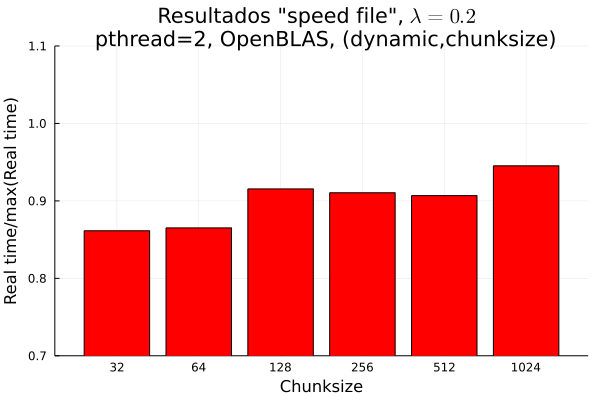

In [8]:
chunksize=["$(timming_matrix1[i+1,1])" for i in 1:length(timming_matrix1[2:end,1])];
plot1=plot(chunksize[1:end],timming_matrix1[2:end,2]/maxvalue,seriestype =:bar,color="red",label="",ylims=(0.7,1.1))
plot1=plot!(title="Resultados \"speed file\", \$λ=0.2\$ \n pthread=2, OpenBLAS, (dynamic,chunksize)",xlabel="Chunksize",ylabel="Real time/max(Real time)")

savefig(plot1,"./plots/RealTimevsChunksizeDynamicSchedule.pdf");
display(plot1);

+ 13_whit_openblas_03schedule_chunksize
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="static,${chunksize}"
    ```

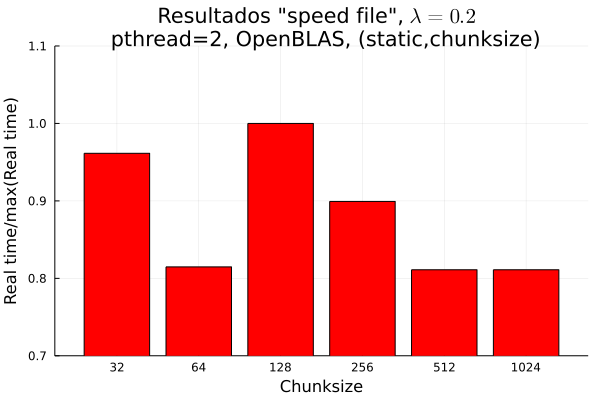

In [7]:
chunksize=["$(timming_matrix2[i+1,1])" for i in 1:length(timming_matrix2[2:end,1])];
plot1=plot(chunksize[1:end],timming_matrix2[2:end,2]/maxvalue,seriestype =:bar,color="red",label="",ylims=(0.7,1.1))
plot1=plot!(title="Resultados \"speed file\", \$λ=0.2\$ \n pthread=2, OpenBLAS, (static,chunksize)",xlabel="Chunksize",ylabel="Real time/max(Real time)")
savefig(plot1,"./plots/RealTimevsChunksizeStaticSchedule.pdf");
display(plot1);

### Tipos de configuraciones con OpenBLAS corriendo con paralelización de MCTDH via OpenMP o via Posix threads

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS (según corresponda)
```bash
    # OpenMP
    export OMP_NUM_THREADS=2
    # OpenBLAS
    export OPENBLAS_NUM_THREADS=1
    export USE_THREAD=0
    export USE_LOCKING=1
    chunksize=512
    export OMP_SCHEDULE="static,${chunksize}"
```

Dentro de `input_file.inp` se utilizó la siguiente configuración para paralelismo con POSIX threads
```bash
    usepthreads=2
```

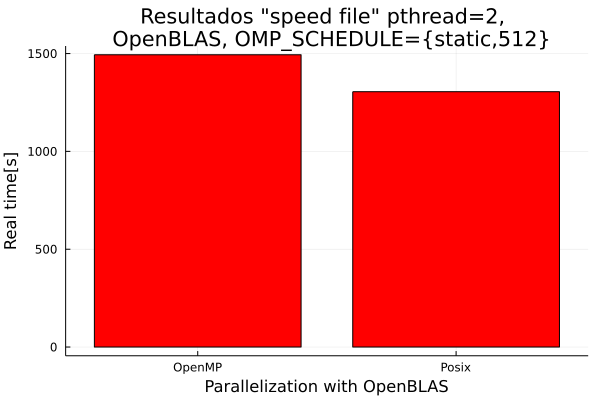

In [70]:
conf = ["OpenMP","Posix"] # [14folder,13folder]
time = [1494,1305]
plt1 = plot(conf,time,seriestype =:bar,color="red",label="")
plot1 = plot!(plt1,title="Resultados \"speed file\" pthread=2, \n OpenBLAS, OMP_SCHEDULE={static,512}",xlabel="Parallelization with OpenBLAS",ylabel="Real time[s]")